In [1]:
import sys
import os

sys.path.insert(0,'../..')
sys.path.insert(0,'../../py')
import parameters
import utilities
import spectrogram_utilities
import output_utilities
import spectrogram_output_visualiser

import numpy as np
import pandas as pd
import datetime
from scipy import stats, signal
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# matplotlib.get_backend()
%matplotlib inline

awd_event = 1
site = parameters.sites[0]
data_location = os.path.join(parameters.database_location, 'awdEvents'+str(awd_event), site, site+'_data')

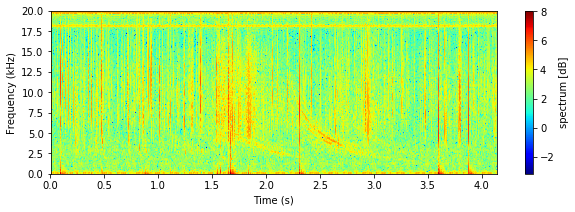

(165888,) (257, 801)


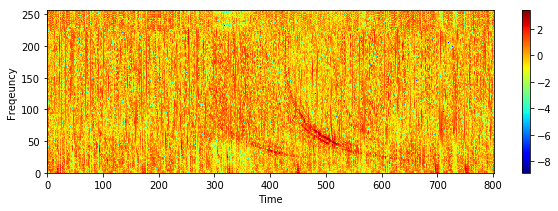

In [3]:
file = utilities.random_file(awd_event, site)
# file = '2013-06-10UT14:20:08.07289609.marion.vr2'
data, fs = spectrogram_utilities.vr2_to_panda(data_location,file, site)
freq, time, spec = spectrogram_utilities.spectrogram_full_plot(data_location,file, site, cmap='jet',
                        nperseg = int(len(data['X'])/800),
                        noverlap=0,
                        nfft=512, 
                        detrend=parameters.detrend,
                        scaling=parameters.scaling,
                        mode = parameters.mode)
print(data['X'].shape, spec.shape)
_spec = stats.zscore(spec, axis = 0)
_spec = stats.zscore(_spec, axis = 1)
fig = plt.figure(figsize=(10,3))
plt.xlabel('Time')
plt.ylabel('Freqeuncy')
img=plt.pcolormesh(_spec, cmap='jet')
fig.colorbar(mappable=img)
plt.show()

(163840,)
(257, 428) (257, 428)
(163968,)
2013-05-28UT13:53:19.96492156.marion.vr2


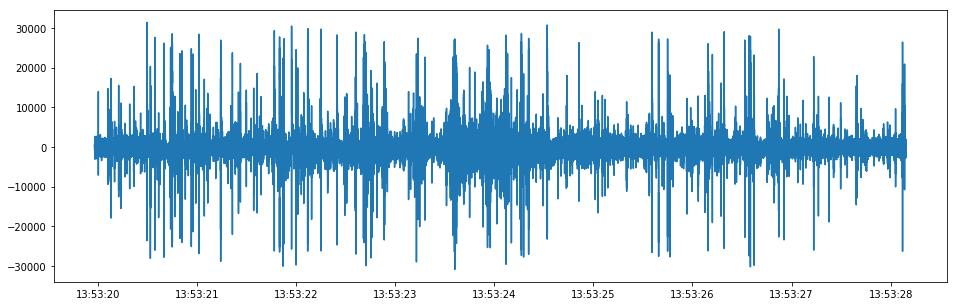

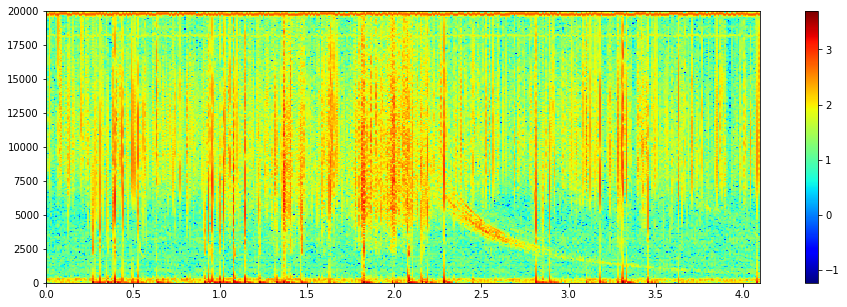

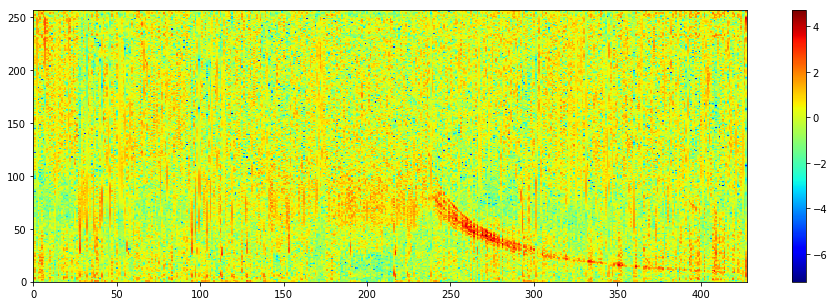

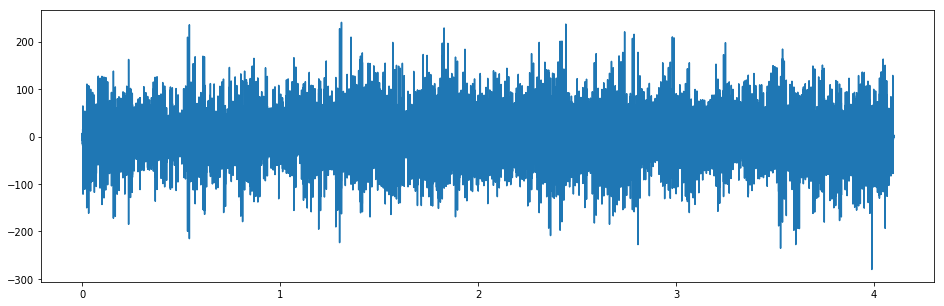

In [30]:
file = utilities.random_file(awd_event, site)
# file = '2013-06-09UT17:21:33.01047109.marion.vr2'
# file = '2013-06-09UT11:23:14.59289609.marion.vr2'
# file = '2013-10-13UT15:18:51.40019406.marion.vr2'
# file = '2013-06-10UT14:20:08.07289609.marion.vr2'
file = '2013-05-28UT13:53:19.96492156.marion.vr2'

# get time data
data = spectrogram_utilities.vr2_to_panda(data_location,file, site)
data = data[0]['X']
plt.figure(figsize=(16,5))
plt.plot(data)
print(data.shape)

fs = 40e3
nperseg = 512
noverlap = 128
nfft=512

# short time fourier transform
from scipy import signal, stats
freq, time, spec = signal.stft(data, fs=fs,
                        nperseg = nperseg,
                        noverlap=noverlap,
                        nfft=nfft)
fig = plt.figure(figsize=(16,5))
img = plt.pcolormesh(time, freq, np.log10(abs(spec)), cmap='jet')
fig.colorbar(mappable=img)


# transform
# _spec=spec
_spec = stats.zscore(np.log10(abs(spec)), axis = 0)
_spec = stats.zscore(_spec, axis = 1)
fig = plt.figure(figsize=(16,5))
img = plt.pcolormesh(_spec, cmap='jet')
fig.colorbar(mappable=img)
print(spec.shape, _spec.shape)

# _spec = signal.medfilt(_spec)
# fig = plt.figure(figsize=(16,5))
# img = plt.pcolormesh(_spec, cmap='jet')
# fig.colorbar(mappable=img)

# inverse short time fourier transform
time, _data = signal.istft(_spec, fs=fs,
                        nperseg = nperseg,
                        noverlap=noverlap,
                        nfft=nfft)
print(_data.shape)
plt.figure(figsize=(16,5))
plt.plot(time, _data)

print(file)

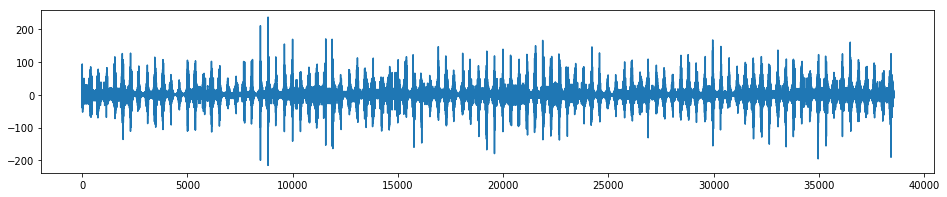

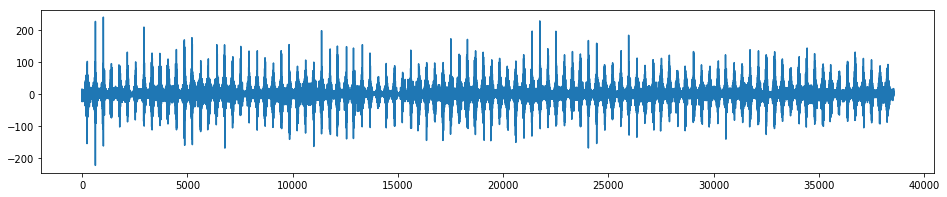

In [31]:
t_start = 50
t_mid = 200
t_end = 350
plt.figure(figsize=(16,3))
plt.plot(_data[t_start*257:t_mid*257])
plt.figure(figsize=(16,3))
plt.plot(_data[t_mid*257:t_end*257])